In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
from platform import python_version

In [4]:
python_version()

'3.8.8'

In [9]:
#definindo a função que gera as posições das barras:
def barpos(x1,x2,q1,q2,n1=1000,n2=1000):
    up = n1 #Quantidade de cargas positivas
    hp = x1 # Posição em x das cargas positivas
    upp = [[], []] #para calculo do campo
    upp1 = [[], []]# para ser plotado
    yp = [] #Guarda a carga positiva

    if q1 >0:
        colorb1 = 'red'
    else:
        colorb1 = 'blue'
        
    if q2 >0:
        colorb2 = 'red'
    else:
        colorb2 = 'blue'
        
    for i in range(up):
        b = -40
        a = 100/up
        upp[0].append(hp)
        upp[1].append(b+i*a)
        yp.append(q1)
        if b+i*a >=0 and b+i*a <=14:
            upp1[0].append(hp)
            upp1[1].append(b+i*a)

    un = n2 #Quantidade de cargas negativas
    hn = x2 # Posição em x das cargas negativas
    unn = [[], []] #para calculo do campo
    unn1 = [[], []] # para ser plotado
    yn = [] #Guarda a carga negativa

    for i in range(un):
        a = 100/un
        unn[0].append(hn)
        unn[1].append(-40+i*a) 
        yn.append(q2)
        if -40+i*a >=0 and -40+i*a <=14:
            unn1[0].append(hn)
            unn1[1].append(-40+i*a)
    return upp,upp1,yp,colorb1,unn,unn1,yn,colorb2

def presetcharges(n=0):
    if n == 0:
        # 1 carga positiva
        qqn = [[], []] # guarda as posições das cargas negativas
        qqp = [[12.5], [6.5]] # guarda as posições das cargas positivas
        qn = [] # guarda a magnitude das cargas negativas
        qp = [1] # guarda a magnitude das cargas positivas
    elif n == 1:
        # 1 carga negativa
        qqp = [[], []] # guarda as posições das cargas negativas
        qqn = [[12.5], [6.5]] # guarda as posições das cargas positivas
        qp = [] # guarda a magnitude das cargas negativas
        qn = [-1] # guarda a magnitude das cargas positivas
    elif n == 2:
        # 2 cargas com sinais diferentes distantes
        qqn = [[16.5], [6.5]] # guarda as posições das cargas negativas
        qqp = [[8.5], [6.5]] # guarda as posições das cargas positivas
        qn = [-1] # guarda a magnitude das cargas negativas
        qp = [1] # guarda a magnitude das cargas positivas
    elif n == 3:
        # 2 cargas negativas
        qqn = [[16,8], [6,6]] # guarda as posições das cargas negativas
        qqp = [[], []] # guarda as posições das cargas positivas
        qn = [-1,-1] # guarda a magnitude das cargas negativas
        qp = [] # guarda a magnitude das cargas positivas
    elif n == 4:
        # 2 cargas positivas
        qqp = [[16,8], [6,6]] # guarda as posições das cargas negativas
        qqn = [[], []] # guarda as posições das cargas positivas
        qn = [] # guarda a magnitude das cargas negativas
        qp = [1,1] # guarda a magnitude das cargas positivas
    elif n == 5:
        # 10 cargas positivas verticalmente alinhadas
        qqp = [[12.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5], [0,1.4,2.8,4.2,5.6,7,8.4,9.8,11.2,12.6]] # guarda as posições das cargas negativas () formato:([X1,X2....], [Y1,Y2.....])
        qqn = [[], []] # guarda as posições das cargas positivas
        qn = [] # guarda a magnitude das cargas negativas
        qp = [1,1,1,1,1,1,1,1,1,1] # guarda a magnitude das cargas positivas
    
    return qqp,qqn,qp,qn
    
    
def calcE(N,M,qn,qqn,qp,qqp):
    #Loop nas cargas negativas:
    for k in range(len(qn)):
        for i in range(N):#N está associado a Y
            for j in range(M):#M está associado a X
                denom = ((i - qqn[1][k]) ** 2 + (j - qqn[0][k]) ** 2) ** lin
                if denom != 0: 
                    Ex[i, j] += qn[k] * (j - qqn[0][k]) / denom
                    Ey[i, j] += qn[k] * (i - qqn[1][k]) / denom
    #Loop nas cargas positivas:
    for k in range(len(qp)):
        for i in range(N):#N está associado a Y
            for j in range(M):#M está associado a X
                denom = ((i - qqp[1][k]) ** 2 + (j - qqp[0][k]) ** 2) ** lin
                if denom != 0: 
                    Ex[i, j] += qp[k] * (j - qqp[0][k]) / denom
                    Ey[i, j] += qp[k] * (i - qqp[1][k]) / denom
    return Ex,Ey
    
def veccol(Ex,Ey):
    # Cor dos vetores
    C = np.hypot(Ex, Ey)
    # normalizando o tamanho dos vetores
    E = (Ex ** 2 + Ey ** 2) ** .5
    #print(Ex)
    Ex = Ex / E
    Ey = Ey / E
    return C,Ex,Ey

Para cargas em locais aleatorios digite 1 e aperte "enter", para selecionar a posição das cargas digite qualquer outro número inteiro: 0
Para simular cargas pontuais coloque 0, para barras carregadas digite 1: 0
1 para usar configurações predefinidas, para configurações livres seja livre para colocar outro inteiro: 1
Selecione o número da configuração desejada 0-5: 2


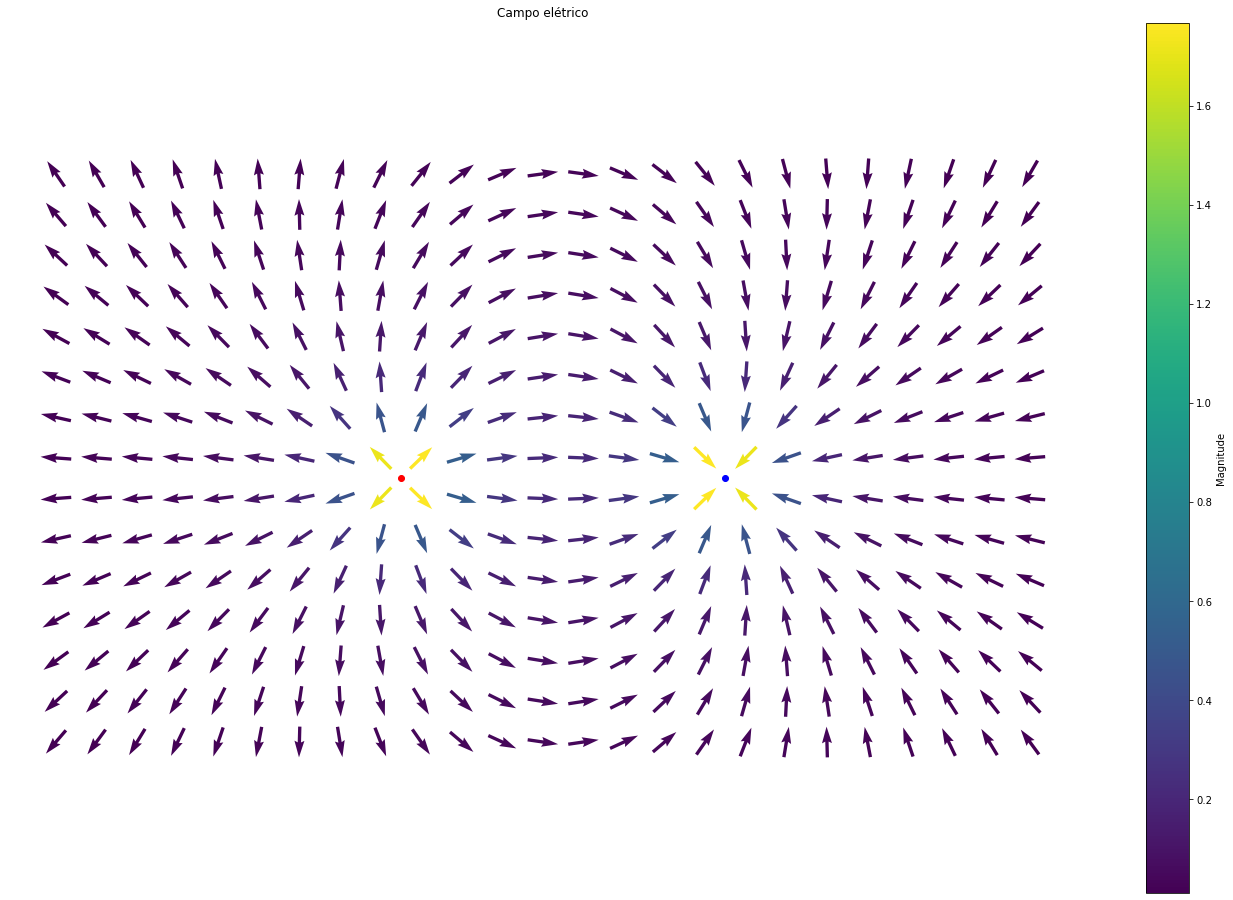

In [12]:
#definindo a grade
N = 15
M = 25
#Coordenadas
X = np.arange(0, M, 1)
Y = np.arange(0, N, 1)
X, Y = np.meshgrid(X, Y)
#Encontrando os campos
Ex = np.zeros((N, M))
Ey = np.zeros((N, M))

lin = 1.3

aleatoriedade = int(input('Para cargas em locais aleatorios digite 1 e aperte "enter", para selecionar a posição das cargas digite qualquer outro número inteiro: '))
if aleatoriedade == 1:
    nq = int(input("digite a quantidade de cargas que você deseja simular: "))
    qq = [[], []]  # guarda as coordenadas das cargas
    chargetype = 0  
    for dummy in range(nq): 
        q = random.choice([-1, 1])
        qy, qx = random.randrange(1, N), random.randrange(1, M)
        # print(q, qx, qy)
        qq[0].append(qx)
        qq[1].append(qy)
        for i in range(N):#N está associado a Y
            for j in range(M):#M está associado a X
                denom = ((i - qy) ** 2 + (j - qx) ** 2) ** lin
                if denom != 0: 
                    Ex[i, j] += q * (j - qx) / denom
                    Ey[i, j] += q * (i - qy) / denom
    plt.figure(figsize=(24, 16))               
    C,Ex,Ey = veccol(Ex,Ey)
    plt.plot(*qq, 'bo')
else:
    chargetype = int(input("Para simular cargas pontuais coloque 0, para barras carregadas digite 1: "))
    if chargetype == 0:
        preset = int(input("1 para usar configurações predefinidas, para configurações livres seja livre para colocar outro inteiro: "))
        if preset == 1:
            n = int(input('Selecione o número da configuração desejada 0-5: '))
            qqp,qqn,qp,qn = presetcharges(n) 
            Ex,Ey = calcE(N,M,qn,qqn,qp,qqp)
            C,Ex,Ey = veccol(Ex,Ey)
            # Desenhando
            plt.figure(figsize=(24, 16))
            plt.plot(*qqn, 'bo',color = 'blue')
            plt.plot(*qqp, 'bo',color = 'red')
            
    else: 
        x1 = float(input("posição em x da primeira barra de 0 a 24 no formato xx.xx: "))
        q1 = float(input("carga da primeira barra no formato xx.xx: "))
        x2 = float(input("posição em x da segunda barra de 0 a 24 no formato xx.xx: "))
        q2 = float(input("carga da segunda barra no formato xx.xx: "))
        qqp,upp1,qp,colorb1,qqn,unn1,qn,colorb2 = barpos(x1,x2,q1,q2,n1=1000,n2=1000)
        Ex,Ey = calcE(N,M,qn,qqn,qp,qqp)
        C,Ex,Ey = veccol(Ex,Ey)
        # Desenhando
        plt.figure(figsize=(24, 16))
        plt.plot(*upp1, 'bo',color = colorb1)
        plt.plot(*unn1, 'bo',color = colorb2)
        
        
# Campo
plt.quiver(X, Y, Ex, Ey, C, pivot='mid')
# Legenda de magnitude
cbar = plt.colorbar()
cbar.ax.set_ylabel('Magnitude')
# misc
plt.title('Campo elétrico')
plt.ylim(14)
plt.xlim(20)
plt.axis('equal')
plt.axis('off')
plt.show()